# <center>Analyzing Forest Fires Data</center>
## Table of Contents
* [1. Introduction](#introduction)
* [2. Ask](#ask)
* [3. Prepare](#prepare)
    * [3.1 Data source](#data_source)
        * [3.1.1 Accessibility and privacy](#data_privacy)
        * [3.1.2 Data organization](#data_organization)     
    * [3.2 Loading packages](#loading)
    * [3.3 Importing the data](#importing)   
    * [3.4 Exploring the data](#exploring)
* [4. Process](#process)
    * [4.1 Removing duplicates](#remove_duplicates)
    * [4.2 Factoring](#factoring)
* [5. Analyze and Share](#analyze)
    * [5.1 Fire frequency](#fire_frequency)
    * [5.2 Risk/natural factors by month](#factors)
    * [5.3 Area vs. risk/natural factors ](#area)
* [6. Conclusion](#conclusion)

## <a id="introduction">1. Introduction</a>

This is a guided project in [Dataquest](https://app.dataquest.io/c/51/m/277/guided-project%3A-analyzing-forest-fire-data/1/exploring-data-through-visualizations-independent-investigations), we'll explore a selected dataset of forest fires in Montesinho park, Portugal, collected from January 2000 to December 2003.

The data is associated with a [scientific research paper](http://www3.dsi.uminho.pt/pcortez/fires.pdf) on predicting the occurrence of forest fires in Portugal using modeling techniques. Here we will not use data modeling, instead, we use R to perform a exploratory data analysis. 

## <a id="ask">2. Ask</a>

#### What is the task?
The goal of this project is to investigate the following questions:
- When were the most fires happen?
- Is there any patterns/relationships behind the data?


## <a id="prepare">3. Prepare</a>

### <a id="data_source">3.1 Data source</a>
The data and its description can be found in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Forest+Fires), it's created by Paulo Cortez and Aníbal Morais (Univ. Minho) in 2007.
We will need to download `forestfires.csv` from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/).

#### <a id="data_privacy">3.1.1 Accessibility and privacy</a>
According `forestfires.names` inside the same folder, the dataset is public available for research.

#### <a id="data_organization">3.1.2 Data organization</a>
Here are descriptions of the variables in the data set and the range of values for each taken from the paper:

* **X**: X-axis spatial coordinate within the Montesinho park map: 1 to 9
* **Y**: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
* **month**: Month of the year: 'jan' to 'dec'
* **day**: Day of the week: 'mon' to 'sun'
* **FFMC**: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
* **DMC**: Duff Moisture Code index from the FWI system: 1.1 to 291.3
* **DC**: Drought Code index from the FWI system: 7.9 to 860.6
* **ISI**: Initial Spread Index from the FWI system: 0.0 to 56.10
* **temp**: Temperature in Celsius degrees: 2.2 to 33.30
* **RH**: Relative humidity in percentage: 15.0 to 100
* **wind**: Wind speed in km/h: 0.40 to 9.40
* **rain**: Outside rain in mm/m2 : 0.0 to 6.4
* **area**: The burned area of the forest (in ha): 0.00 to 1090.84

where the acronym **FWI** stands for "fire weather index", a method used by scientists to quantify risk factors for forest fires.

For convenience, we refer to the variables related to FWI (`FFMC`, `DMC`, `DC`, `ISI`) as **Risk Factors**, the other 4 variables (`temp`, `RH`, `wind`, `rain` ) as **Natural Factors**.

### <a id="loading">3.2 Loading packages</a>

Make sure to install package `tidyverse` and `ggplot2` before loading them, here we can skip the installation as it has been done before.

In [1]:
library(tidyverse)
library(ggplot2)

# make sure all columns are showing up
options(repr.matrix.max.cols = 100, repr.matrix.max.rows = 100)

# for clean output, quit the message showing the guessed column types 
options(readr.show_col_types = FALSE)

# set default theme options
theme_set(
  theme_void() + 
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = .5),
    axis.title.y=element_text(angle = 90),
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    strip.text = element_text(size = 14)
  )
)

── Attaching packages ───────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### <a id="importing">3.3 Importing the data </a> 

In [2]:
forest_fires <- read_csv("forestfires.csv")

### <a id="exploring">3.4 Exploring the data</a> 

First of all, let's check its dimensions.

In [3]:
dim(forest_fires)

[1] 517  13

The dataset has 513 rows only, we must be careful to remove or filter data. Then, let's check the first 6 rows.

In [4]:
# test
x <- forest_fires %>% filter(month == 'Jan')
x

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [5]:
head(forest_fires)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


Get the summary statistics of each column:

In [6]:
summary(forest_fires)

       X               Y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      FFMC            DMC              DC             ISI        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp             RH              wind            

What we can learn from its statistics:
- There are no missing values.
- Values in numeric columns are all positive, no obvious errors.
- There are 2 character columns, `month` and `day`.

Next, let's get the unique values of these 2 character columns.

In [7]:
cat("Unique values of month: ", unique(forest_fires$month), "\n")
cat("Unique values of day: ", unique(forest_fires$day))

Unique values of month:  mar oct aug sep apr jun jul feb jan dec may nov 
Unique values of day:  fri tue sat sun mon wed thu

They are short names of month and day, R would automatically sort them by alphabetical order, which might be confusing. Next, we will need to sort them chronologically for better understanding.

## <a id="process">4. Process</a>

#### <a id="remove_duplicates">4.1 Removing duplicates</a>

In [8]:
forest_fires <- forest_fires %>% distinct()

#### <a id="factoring">4.2 Factoring</a>

We can use function `factor()` to change the order of `month` and `day`.

In [9]:
# convert the first letter of month and day to uppercase, then re-order them chronologically. 
forest_fires <- forest_fires %>% 
  mutate(
    month = str_to_title(month),
    day = str_to_title(day),
    month = factor(month, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")),
    day = factor(day, levels = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")),
  )

Now we already have a clean dataset to work with, let's start our analysis and create visualizations.

## <a id="analyze">5. Analyze and Share</a>

### <a id="fire_frequency">5.1 Fire Frequency</a>
#### Question 1: Which months do forest fires happen the most?

A bar chart can clearly display the number of forest fires by month.

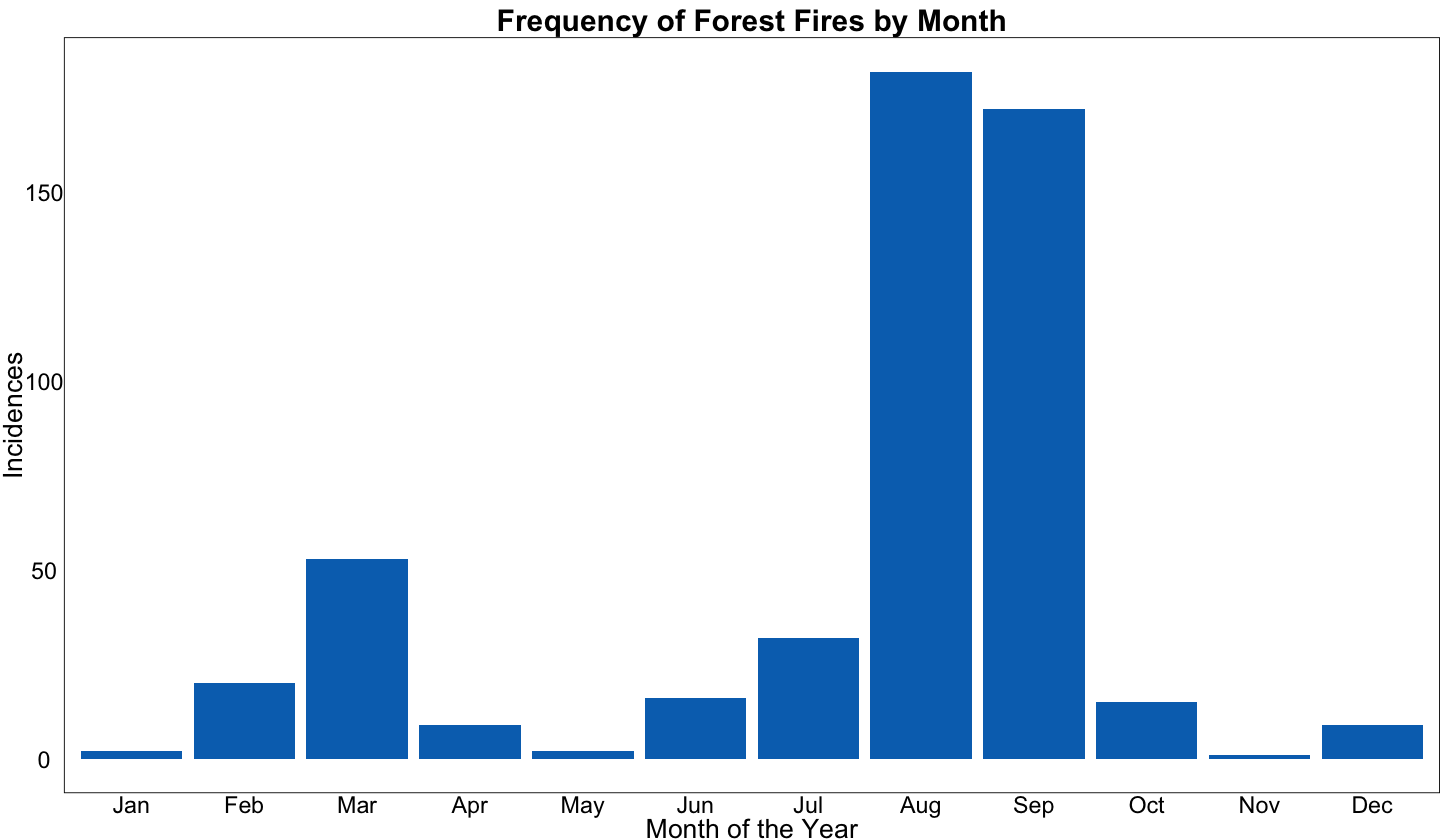

In [10]:
options(repr.plot.width = 12, repr.plot.height = 7)

forest_fires %>% 
  ggplot(aes(x = month)) +
  geom_bar(fill = "#0071bc") +
  labs(
    title = "Frequency of Forest Fires by Month",
    x = "Month of the Year",
    y = "Incidences"
  )

August and September have much more forest fires than other months, is it due to the high temperature? If temperature is the key factor, it explains why cold months (November, December and January) have less forest fires, but why fire frequency in May is also low? Let's investigate further in next step.

#### Question 2: Which day do forest fires happen the most?

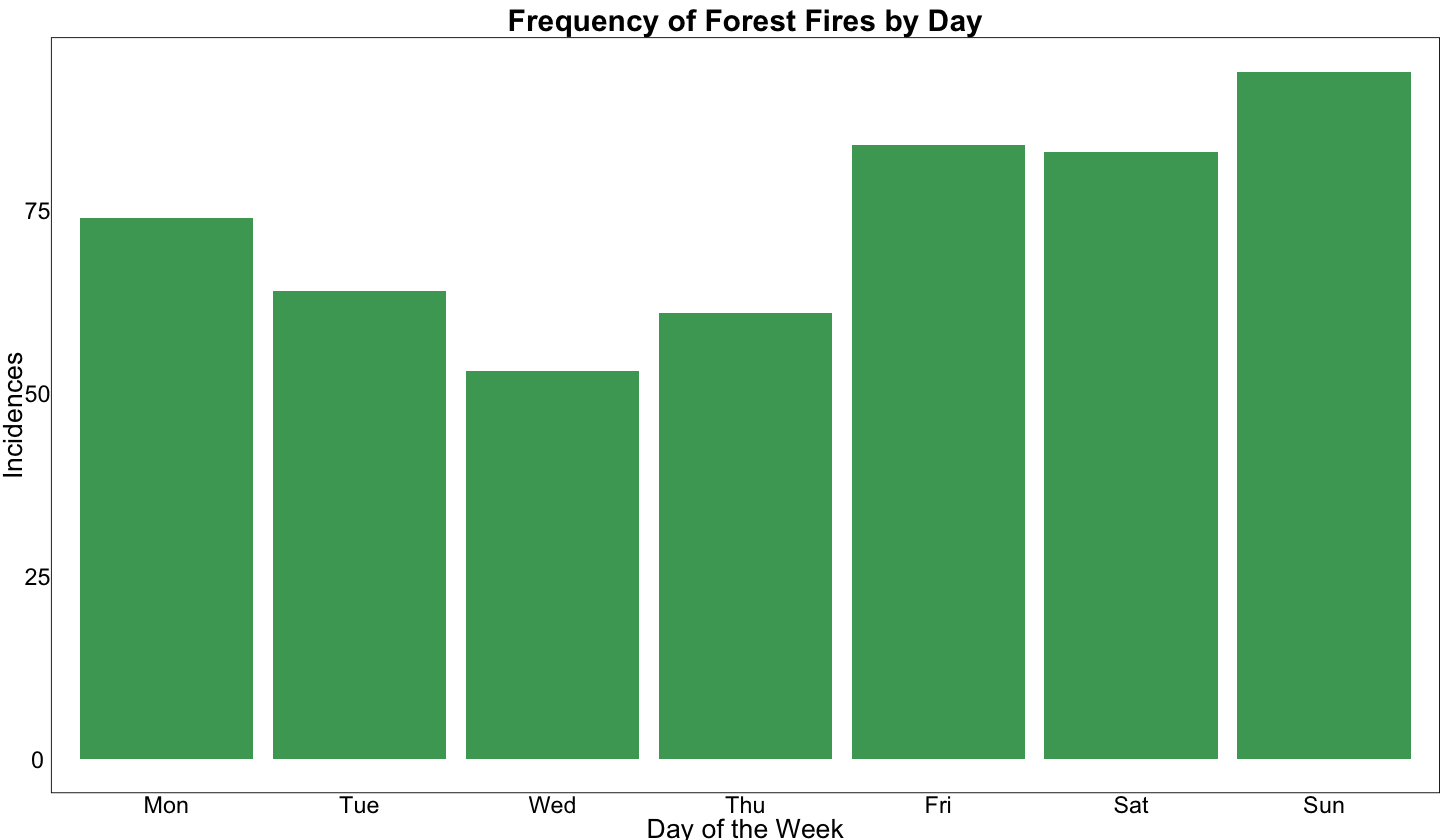

In [11]:
forest_fires %>% 
  ggplot(aes(x = day)) +
  geom_bar(fill = "#4aa564") +
  labs(
    title = "Frequency of Forest Fires by Day",
    x = "Day of the Week",
    y = "Incidences"
  )

Friday, Saturday and Sunday have more forest fires than midweek, is it because people tend to go to forests (hiking, picnic, etc.) on weekends, and such activities have high risk to cause fire? This dataset has no column that directly related to human activities, so this hypothesis need further investigation.

Moreover, we can create a heatmap of fire frequency by month and day to show their relationships.

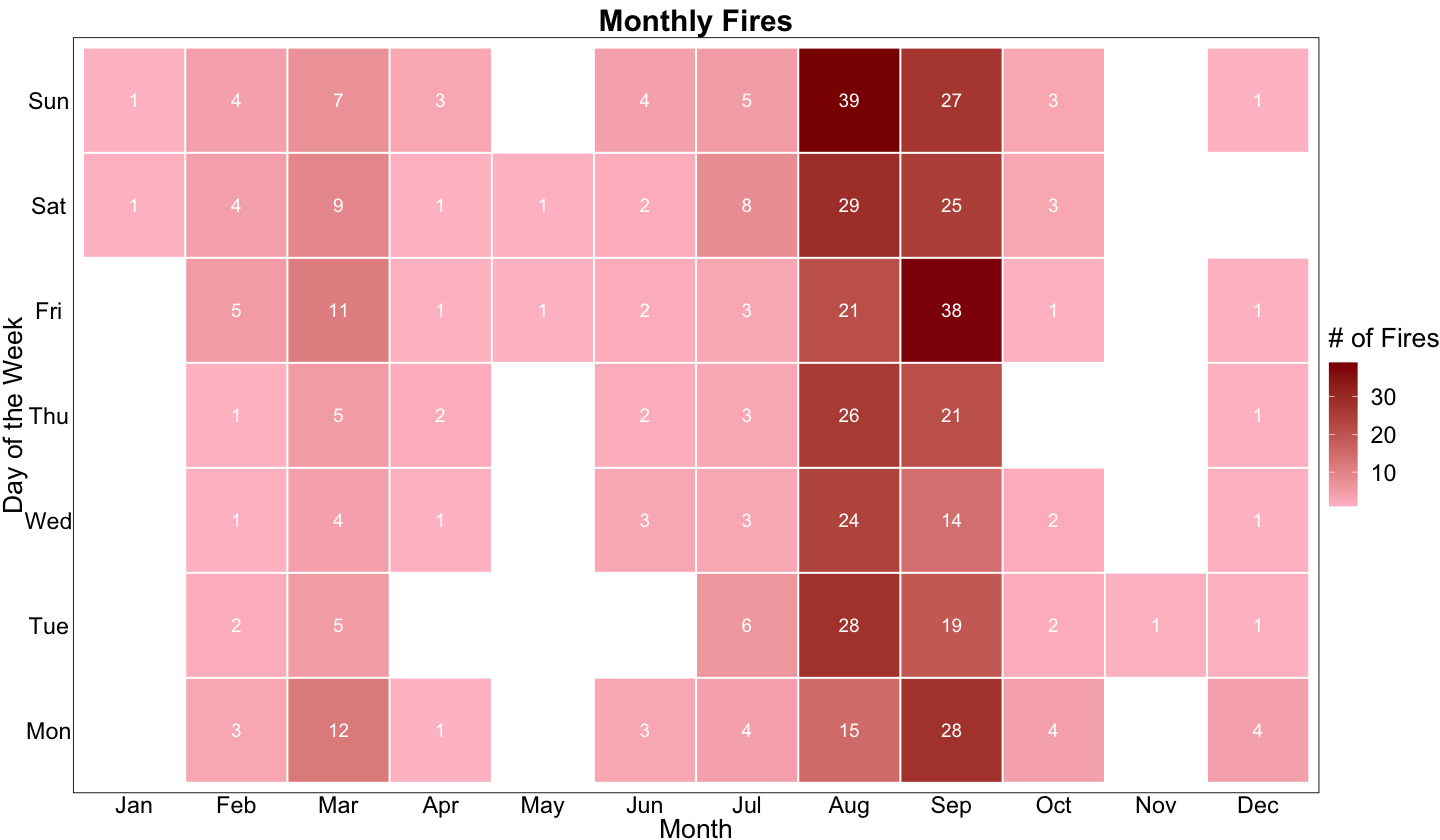

In [12]:
# grouped by `month` and `day`
fires_grouped <- forest_fires %>% 
  group_by(month, day) %>% 
  count() %>%
  ungroup()

fires_grouped  %>% 
  ggplot(aes(x = month, y = day, fill = n)) +
  geom_tile(color = "white", lwd = .5) +
  scale_fill_gradient(low = "pink", high = "darkred") +
  geom_text(aes(label = n), color = "white", size = 4) +
  guides(fill = guide_colourbar(title = "# of Fires")) +
  labs(
    title = "Monthly Fires",
    y = "Day of the Week",
    x = "Month"
  )

Fires are most frequent on Sundays in August and Fridays in September.

### <a id="factors">5.2 Risk/natural factors by month</a>

To explore the patterns of forest fire occurrence the bar charts reveal, we are going to take a closer look at how the other variables vary by month.

Here we excludes `day` since the difference between the difference in days is probably due to human activities, while months are more likely to have relationships with risk factors and natural factors. We also exclude `area`, since it's the result of fires not reasons. 

First of all, we need to convert the wide data to long data using `pivot_longer` function:

In [13]:
forest_fires_long <- forest_fires %>%
  pivot_longer(
    cols = c(FFMC, DMC, DC, ISI, temp, RH, wind, rain),
    names_to = "column",
    values_to = "value"
  )

Create visualizations:

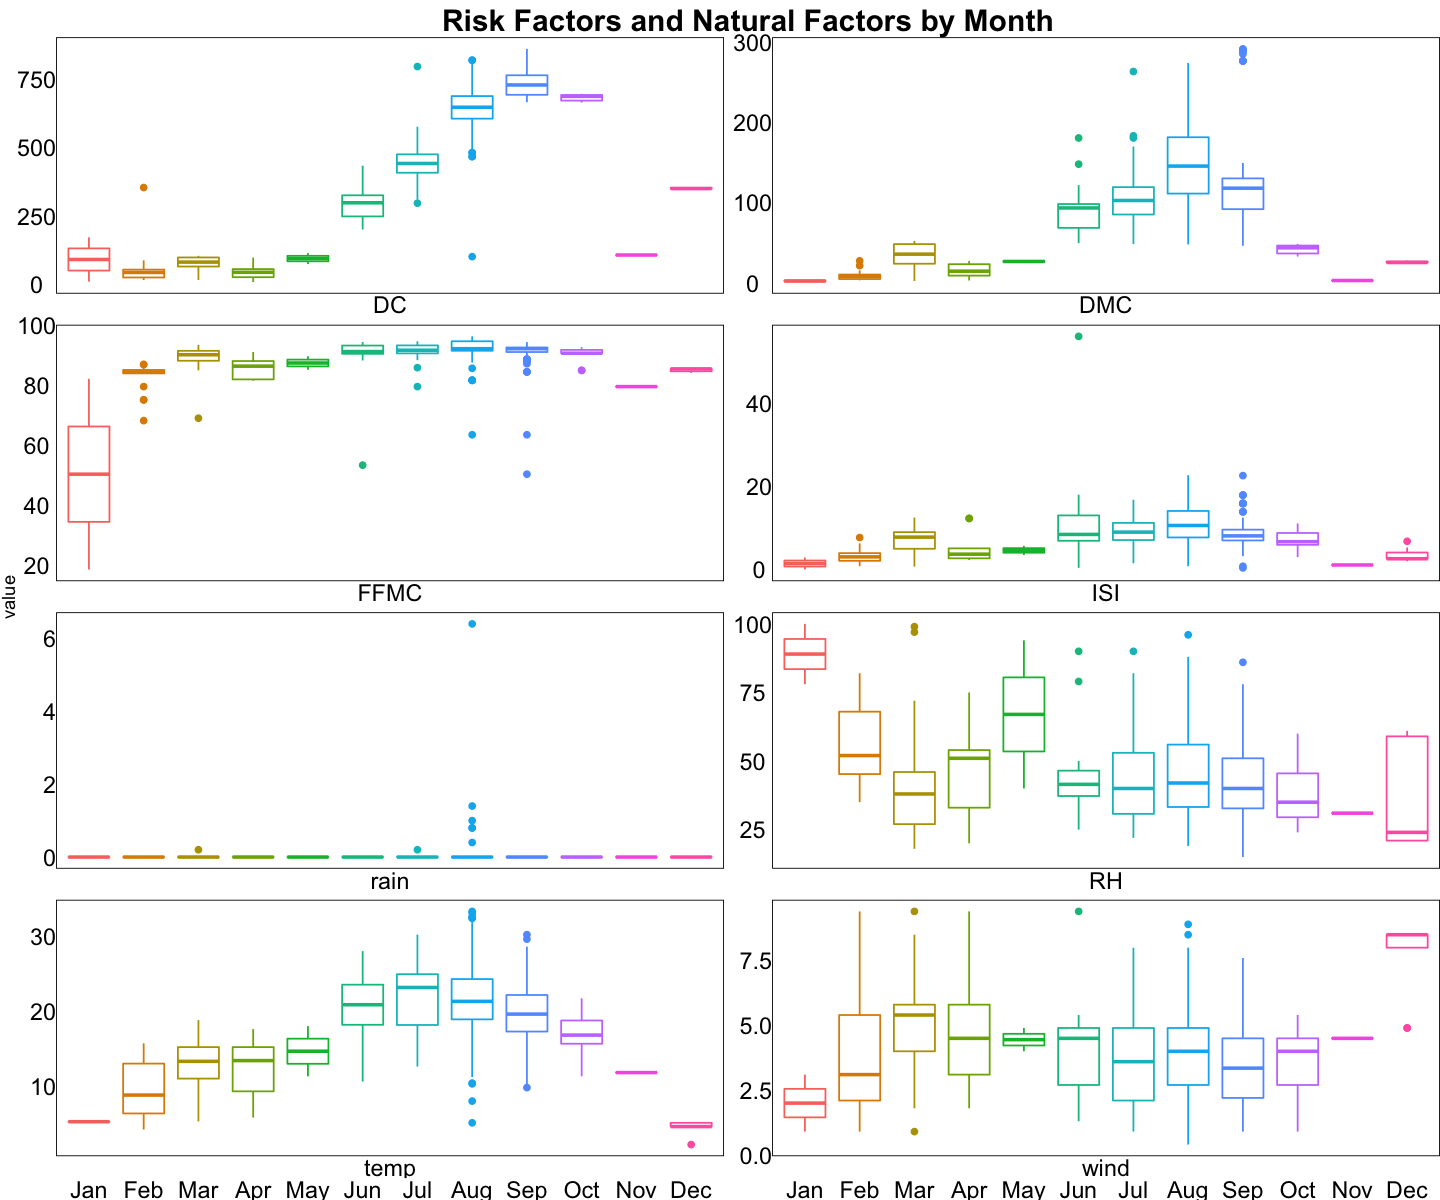

In [14]:
options(repr.plot.width = 12, repr.plot.height = 10)

forest_fires_long %>%
  ggplot(aes(x = month, y = value, color = month)) +
  geom_boxplot() +
  facet_wrap(
    vars(column),
    nrow = 4,
    scales = "free_y",
    strip.position = "bottom"
  ) +
  theme(
    axis.title = element_blank(),
    legend.position = "none"
  ) +
  labs(title = "Risk Factors and Natural Factors by Month")

According to the above plots, `DC`, `DMC` and `temp` are relatively high on August and September, those 3 variables might have positive relationships with fire frequency. But why March has the 3rd highest fire frequency, considering `DC`, `DMC` and `temp` of July are higher than that of March? There may be other factors that this dataset did not take into account, a further investigation is needed.


We already have a basic understanding of fire's frequency, next, we will analyze the severity of fires. This data has no variable directly related to that, here we can select `area` as the indicator of the severity, because the more serious the fire, the larger the burned area.

### <a id="area">5.3 Area vs. risk/natural factors</a>

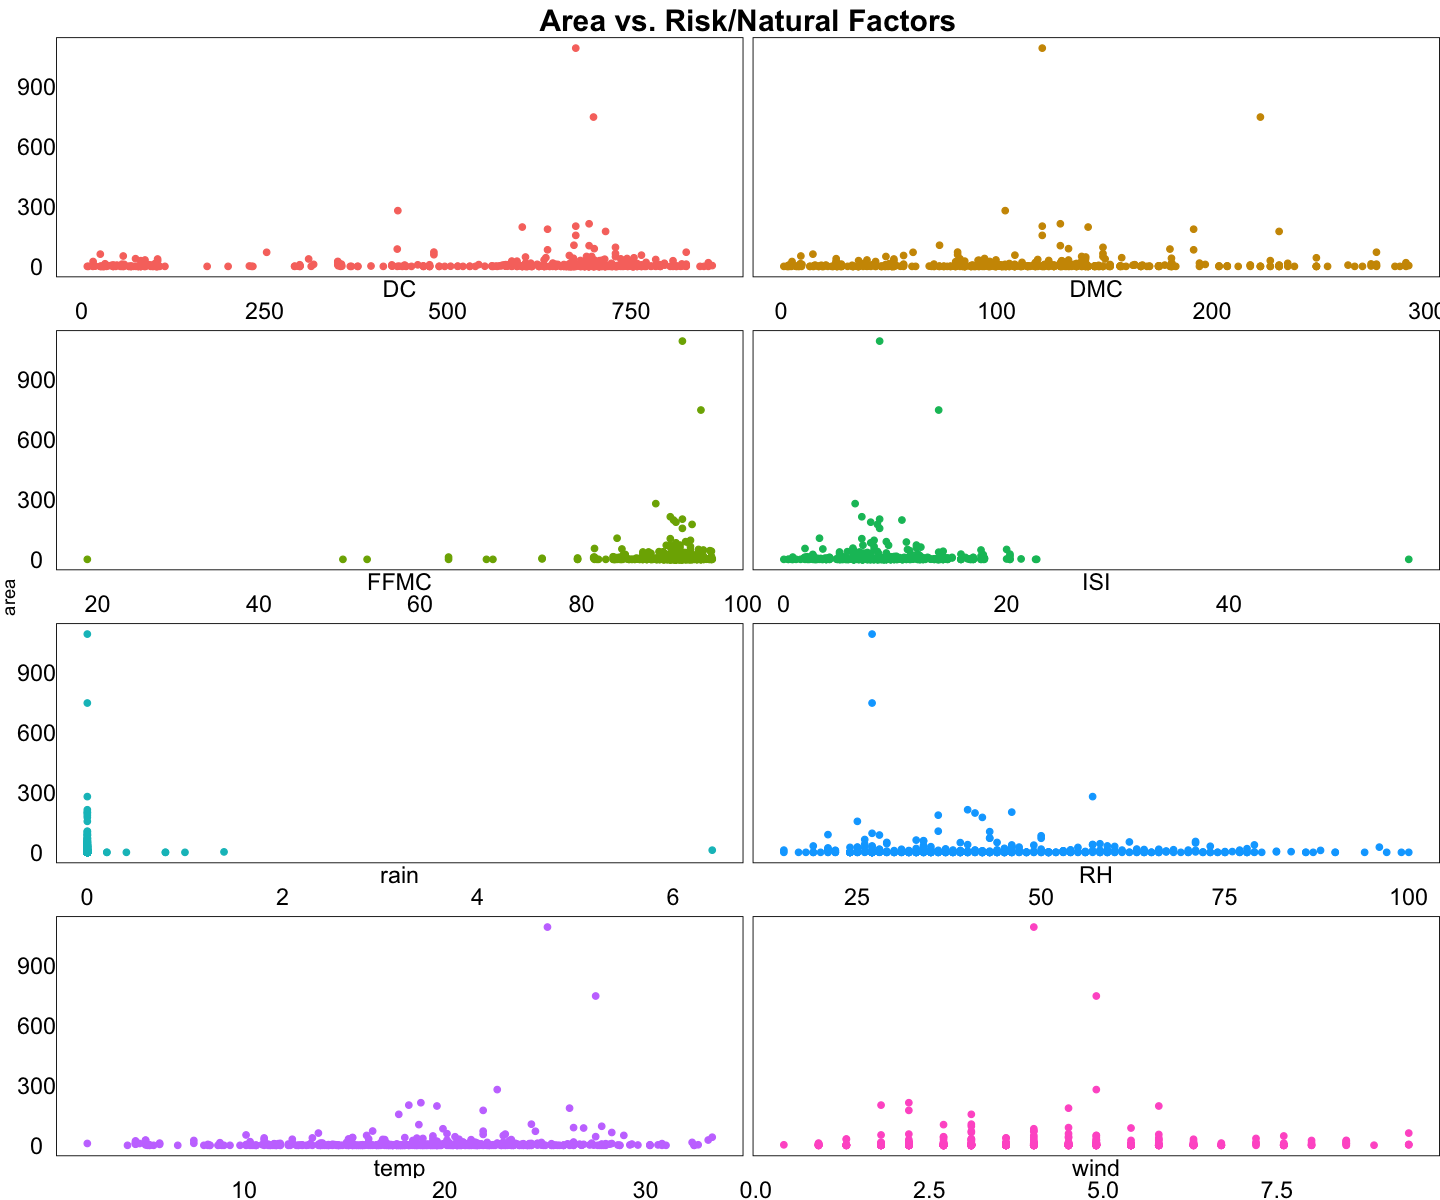

In [15]:
forest_fires_long %>%
  ggplot(aes(x = value, y = area, color = column)) +
  geom_point() +
  facet_wrap(
    vars(column),
    nrow = 4,
    scales = "free_x",
    strip.position = "bottom"
  ) +
  theme(
    axis.title = element_blank(),
    legend.position = "none"
  ) +
  labs(title = "Area vs. Risk/Natural Factors")

It's hard to understand relationships between variables when we look at these plots. There are a few points smaller than 300 clustered around the bottom of the plots, while some points have area value larger than 900. 

To get a better understanding of the distribution of `area`, we can use histogram:

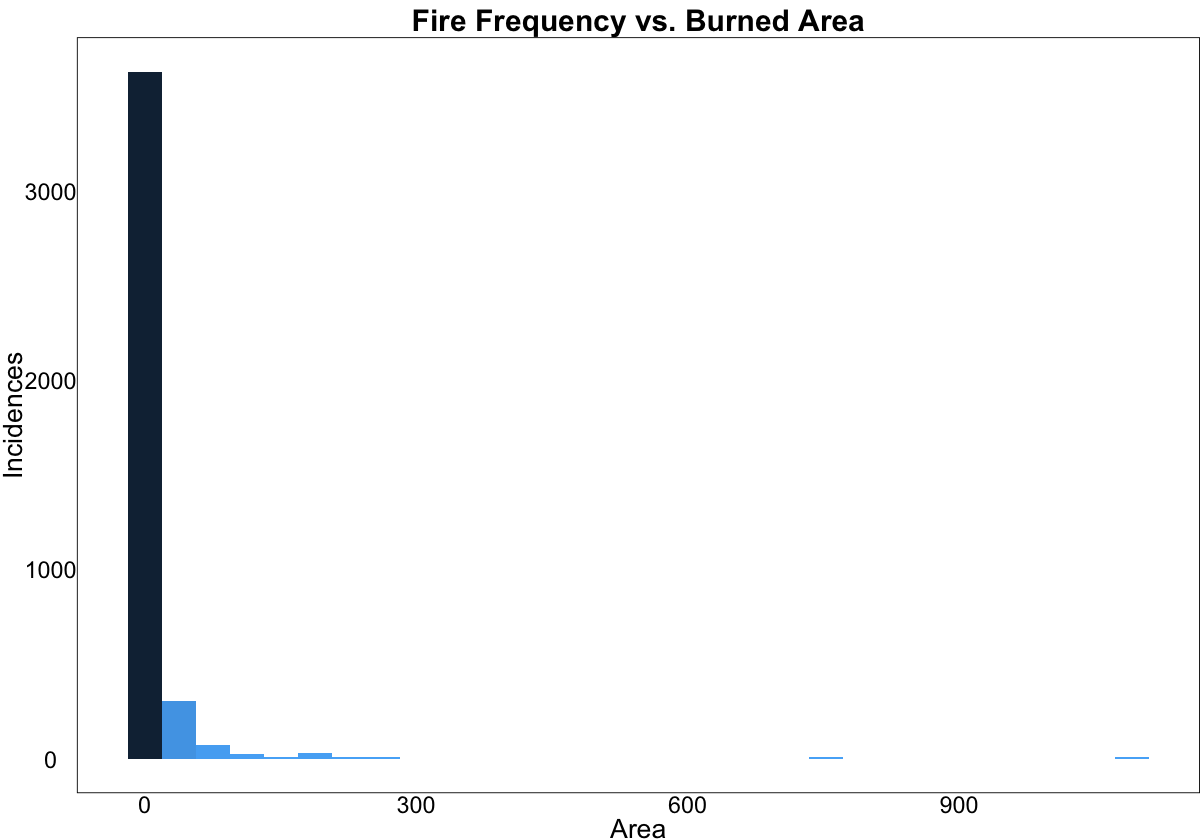

In [16]:
options(repr.plot.width = 10, repr.plot.height = 7)

forest_fires_long %>%
  ggplot(aes(x = area, fill = -..count..)) +
  geom_histogram(bins = 30) +
  theme(
    legend.position = "none"
  ) +
  labs(
    title = "Fire Frequency vs. Burned Area",
    x = "Area",
    y = "Incidences"
  )  

According to the histogram, we may regard the area equals to 0 or larger than 300 as "outliers". Next, we can filter out those outliers to visualize the data more clearly.

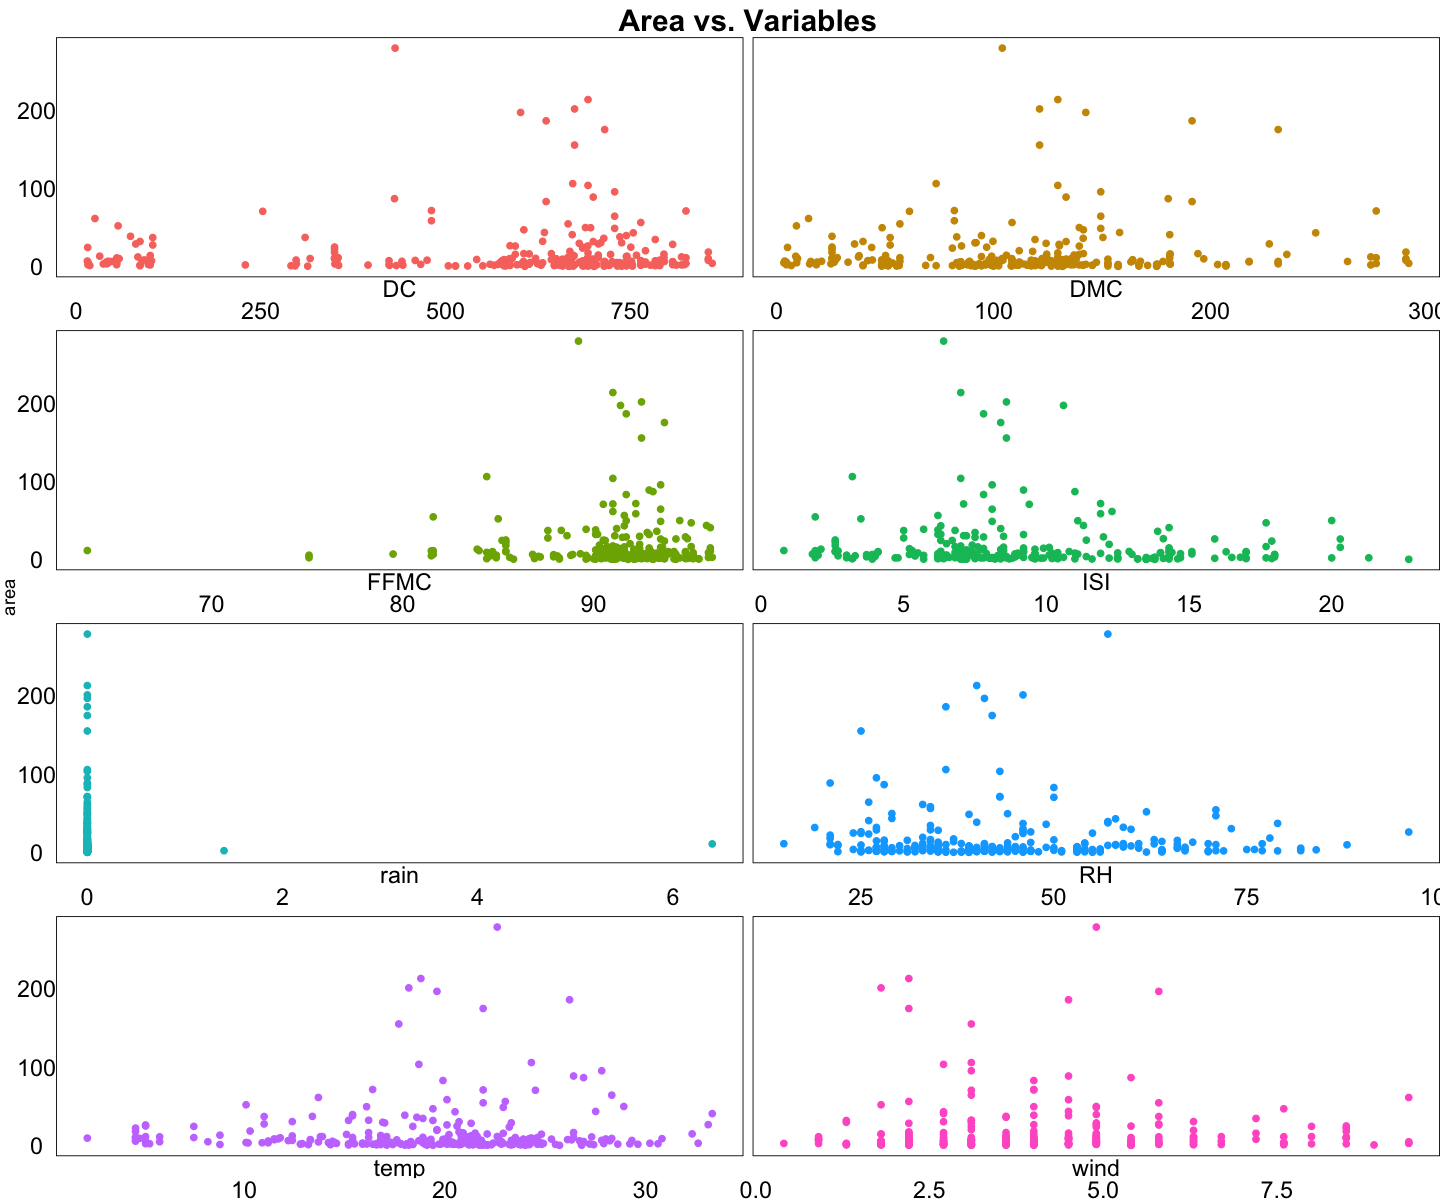

In [17]:
options(repr.plot.width = 12, repr.plot.height = 10)

forest_fires_long_filtered <- forest_fires_long %>% 
  filter(area > 0 & area <= 300)

forest_fires_long_filtered %>%
  ggplot(aes(x = value, y = area, color = column)) +
  geom_point() +
  facet_wrap(
    vars(column),
    nrow = 4,
    scales = "free_x",
    strip.position = "bottom"
  ) +
  theme(
    axis.title = element_blank(),
    legend.position = "none"
  ) +
  labs(title = "Area vs. Variables")

It still doesn't seem to have any interesting relationships. Let's double check by computing their correlations, here it's more convenient to use the original wide data.

In [18]:
forest_fires_filtered <- forest_fires %>%
  filter(area > 0 & area <= 300)

# calculate correlation coefficient
cor_variables <- cor(
    forest_fires_filtered$area,
    forest_fires_filtered[c("DC", "DMC", "FFMC", "ISI", "rain", "RH", "temp", "wind")]
  )

print(round(cor_variables, 3))

        DC   DMC FFMC    ISI   rain     RH  temp  wind
[1,] 0.023 0.074 0.01 -0.065 -0.018 -0.045 0.063 -0.02


These values are all very close to 0 (the absolute value is smaller than 0.25), which means the relationships between area and these 8 variables are very weak or no relationship. 

## <a id="conclusion">6. Conclusion</a>

* Weekends have more forest fires than weekdays.

* August and September have the most forest fires, while November has the least forest fires.

* Places with higher `DC`, `DMC`, `temp` are more likely to have forest fires, but the reason why March has more fires than July is unknown, a further investigation is needed.

* Burned area has little relationships with risk factors (`DC`, `DMC`, etc.) and natural factors (`rain`, `temp`, etc).